In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.shape

(768, 9)

In [12]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


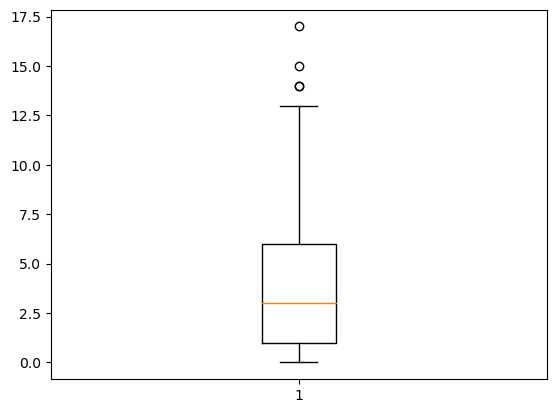

In [17]:
plt.boxplot(data=df,x=df['Pregnancies'])
plt.show()

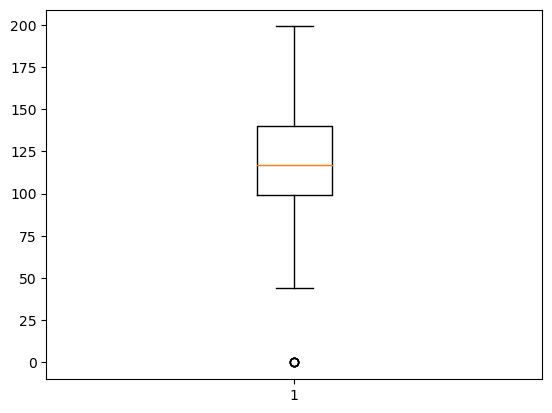

In [18]:
plt.boxplot(data=df,x=df['Glucose'])
plt.show()

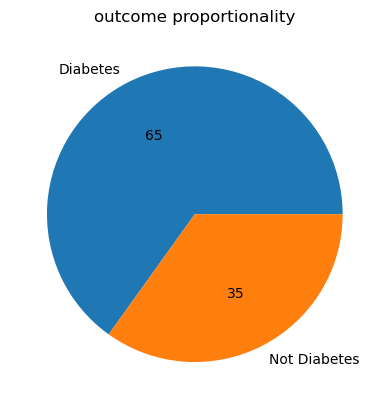

In [25]:
plt.pie(df.Outcome.value_counts(),labels=['Diabetes','Not Diabetes'],autopct='%.f')
plt.title('outcome proportionality')
plt.show()

In [26]:
X=df[['Pregnancies','Glucose','BloodPressure',]]
X

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


In [27]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [33]:
X_train

,Pregnancies,Glucose,BloodPressure
140,3,128,78
358,12,88,74
143,10,108,66
674,8,91,82
121,6,111,64
...,...,...,...
73,4,129,86
400,4,95,64
118,4,97,60
701,6,125,78


In [35]:
X_test

,Pregnancies,Glucose,BloodPressure
567,6,92,62
123,5,132,80
615,3,106,72
492,4,99,68
288,4,96,56
...,...,...,...
432,1,80,74
480,3,158,70
7,10,115,0
564,0,91,80


In [36]:
from sklearn.linear_model import LogisticRegression


In [38]:
model=LogisticRegression(max_iter=2000)

In [39]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [40]:
model.coef_

array([[ 0.12662721,  0.03611616, -0.00645613]])

In [41]:
predictions=model.predict(X_test)

In [42]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

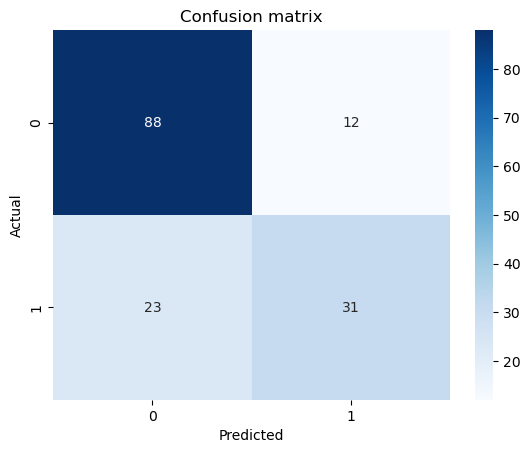

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cof_matrix=confusion_matrix(y_test,predictions)
plt.figure(dpi=100)
sns.heatmap(cof_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [52]:
Result=pd.DataFrame({'Actual':y_test,'Predictions':predictions})

In [56]:
Result

,Actual,Predictions
567,0,0
123,0,0
615,0,0
492,0,0
288,0,0
...,...,...
432,0,0
480,1,1
7,0,1
564,0,0
